### Word embedings: основная идея

Векторное представление основывается на контекстной близости: слова, встречающиеся в тексте рядом с одинаковыми словами (а следовательно, имеющие схожий смысл), в векторном представлении имеют высокое косинусное сходство

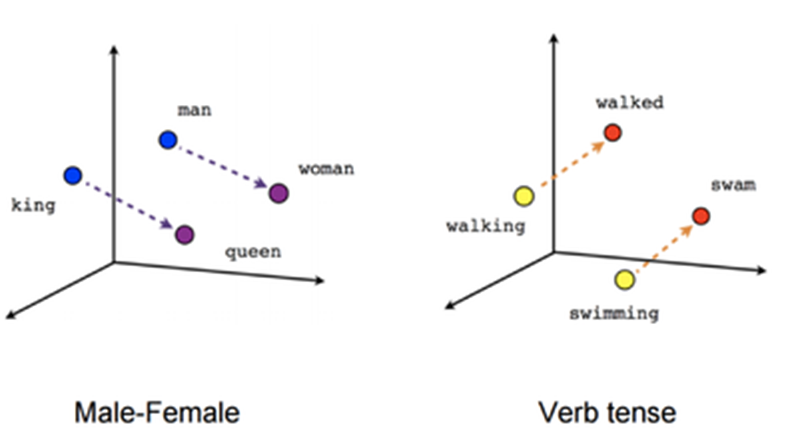

## SVD

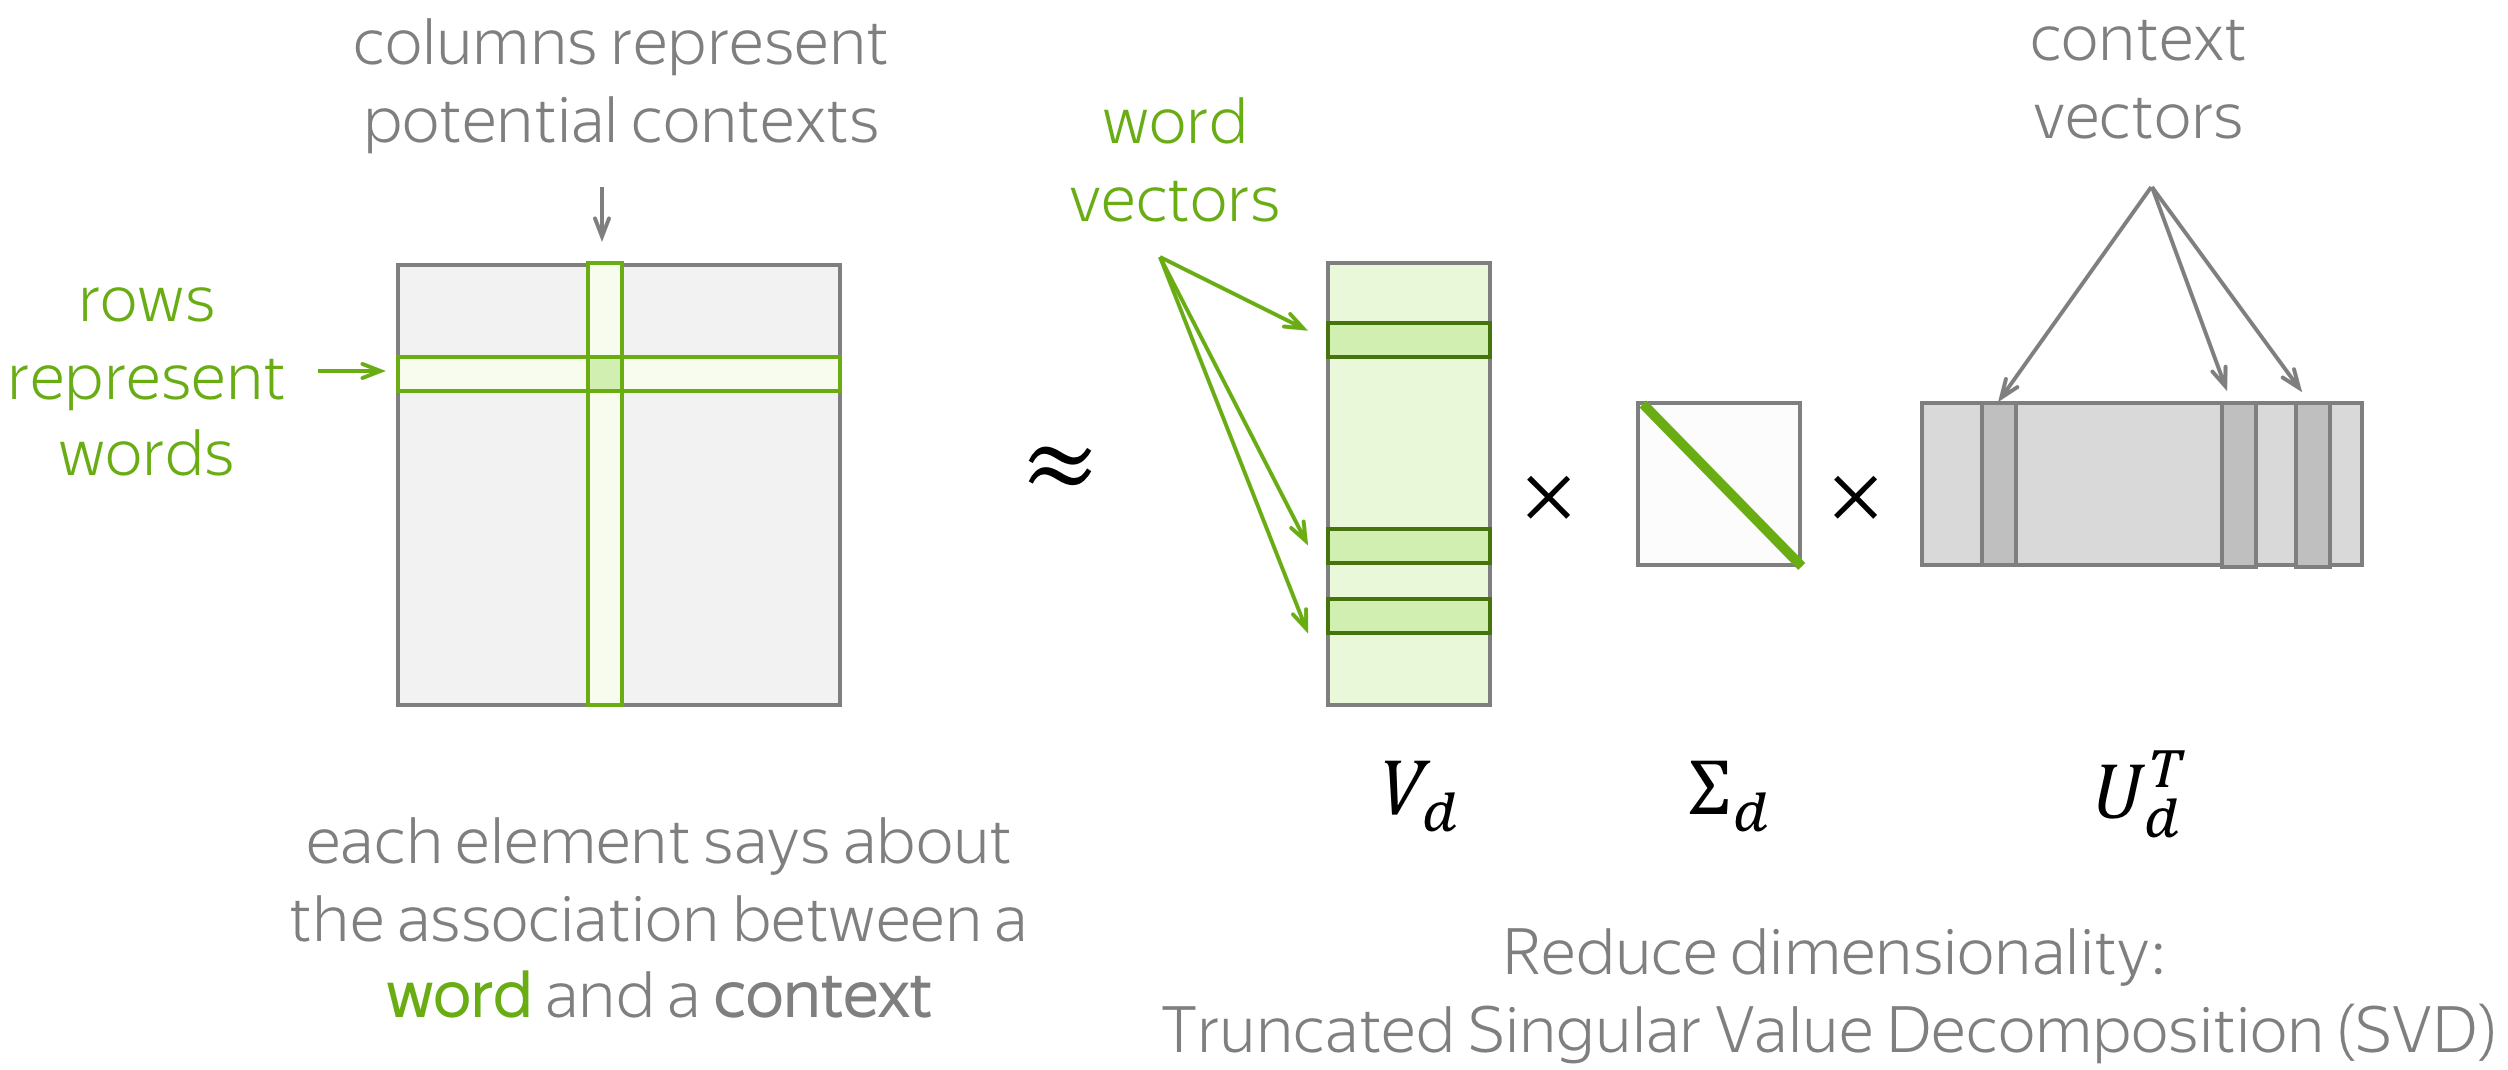

### CountVectorizer + TruncatedSVD

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.rcParams["figure.figsize"] = (12, 8)

In [ ]:
data = fetch_20newsgroups()
text_categories = data.target_names
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [ ]:
%%time

model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.7),
    TruncatedSVD(n_components=256, n_iter=25, random_state=2023),
    LogisticRegression(),
)
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 1min 13s, sys: 21.8 s, total: 1min 35s
Wall time: 1min 23s


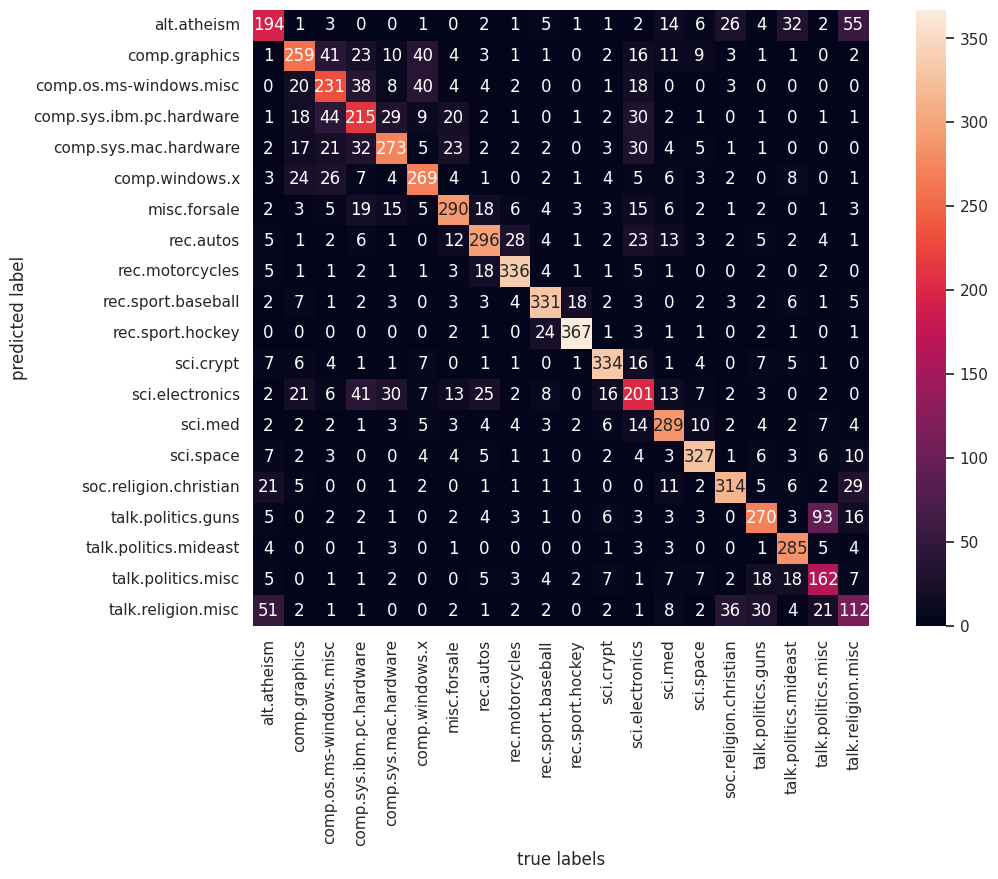

In [ ]:
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [ ]:
print(classification_report(test_data.target, predicted_categories))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       319
           1       0.61      0.67      0.63       389
           2       0.63      0.59      0.61       394
           3       0.57      0.55      0.56       392
           4       0.65      0.71      0.68       385
           5       0.73      0.68      0.70       395
           6       0.72      0.74      0.73       390
           7       0.72      0.75      0.73       396
           8       0.88      0.84      0.86       398
           9       0.83      0.83      0.83       397
          10       0.91      0.92      0.91       399
          11       0.84      0.84      0.84       396
          12       0.50      0.51      0.51       393
          13       0.78      0.73      0.76       396
          14       0.84      0.83      0.84       394
          15       0.78      0.79      0.78       398
          16       0.65      0.74      0.69       364
          17       0.92    

In [ ]:
train_data.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
count_vectors = model['countvectorizer'].transform(train_data.data[0:3])
count_vectors.shape

(3, 129793)

In [ ]:
svd_vectors = model['truncatedsvd'].transform(count_vectors)
print(svd_vectors.shape)

(3, 256)


In [ ]:
svd_vectors[0][:15]

array([ 7.80124596e-04,  1.13765394e-01,  1.59513871e+00, -1.37386619e-01,
       -1.03836660e-01, -7.82966078e-02, -1.09414331e-01, -6.50686934e-01,
       -5.80552556e-01,  4.20441408e-01, -1.05306428e+00,  5.33549701e-03,
        3.45157358e-01,  7.21570076e-01, -3.20268682e-02])

### PPMI (Positive Pointwise Mutual Information)

В качестве исходной матрицы можно брать не только words counts в каком-то окне.

PPMI опирается на интуицию, что лучший способ измерить связь между двумя словами заключается в том, чтобы посчитать, как часто два слова встречаются в корпусе вместе, чем поотдельности:

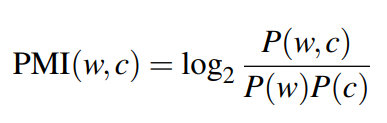




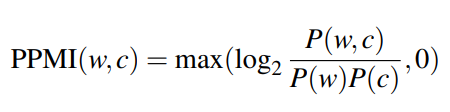

## Word2Vec

### Skip-Gram & CBOW

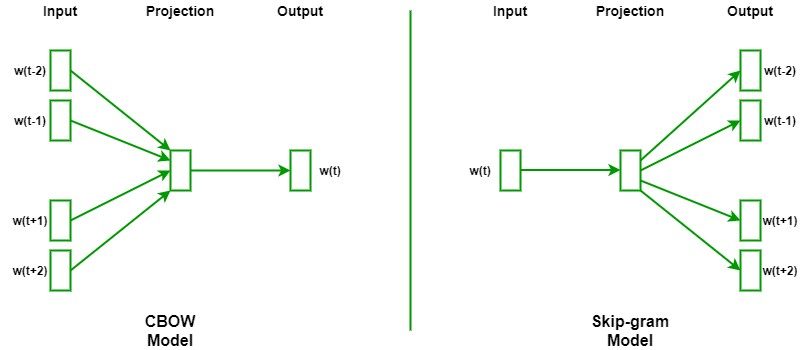

#### Skip-Gram Матричный вид

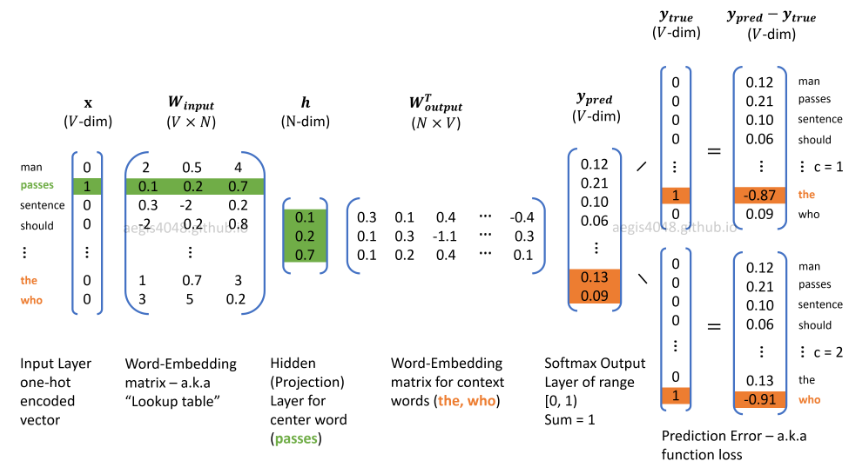

### Gensim

[Gensim](https://radimrehurek.com/gensim/index.html) – библиотека обработки естественного языка предназначения для «Тематического моделирования». С его помощью можно обрабатывать тексты, работать с векторными моделями слов (такими как Word2Vec, FastText и т. д.) и создавать тематические модели текстов

In [ ]:
import gensim.downloader as api
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

`word2vec-ruscorpora-300` - word2vec обученный на Russian National Corpus (~ 250M слов), SkipGram с окном 10

В модели "word2vec-ruscorpora-300" после слова указывается часть речи: NOUN (существительное), ADJ (прилагательное) и так далее.

[Расшифровка POS-тегов](https://yandex.ru/dev/mystem/doc/grammemes-values.html/#grammemes-values__parts)

[Другие предобученные эмбеддинги gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)

[Репозиторий gensim-data](https://github.com/RaRe-Technologies/gensim-data)

In [ ]:
wv = api.load('word2vec-ruscorpora-300')

[=================================================-] 99.1% 196.9/198.8MB downloaded


In [ ]:
word_vector = wv['человек']
word_vector.shape

KeyError: ignored

In [ ]:
word_vector = wv['человек_NOUN']
word_vector.shape

(300,)

In [ ]:
wv.most_similar(positive=['человек_NOUN', 'компьютер_NOUN'], topn=5)

[('компьютерный_ADJ', 0.591947615146637),
 ('программист_NOUN', 0.5713083744049072),
 ('ноутбук_NOUN', 0.5553575158119202),
 ('пользователь_NOUN', 0.5512850880622864),
 ('интернет_NOUN', 0.5506680011749268)]

In [ ]:
wv.most_similar(positive=['королева_NOUN'], negative=['женщина_NOUN'], topn=5)

[('король_NOUN', 0.4940599203109741),
 ('королевский_ADJ', 0.4431174397468567),
 ('саксен::кобург_NOUN', 0.371537983417511),
 ('принц::уэльский_NOUN', 0.36908257007598877),
 ('королевство_NOUN', 0.3571174144744873)]

In [ ]:
print(wv.doesnt_match(['январь_NOUN', 'февраль_NOUN', 'март_NOUN', 'апрель_NOUN', 'собака_NOUN']))

собака_NOUN


### Обучение своих SkipGram эмбеддингов с Gensim

[Gensim Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec)

Загрузим данные из Corus и пайплайн обработки из Spacy

In [ ]:
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [ ]:
!pip install corus

In [ ]:
!python3 -m spacy download ru_core_news_sm

In [ ]:
import gensim.models
from corus import load_lenta
import spacy
import string

In [ ]:
path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
data = [next(records).text for i in range(10000)]

In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
%%time

res = []

for doc in nlp.pipe(data):
    res.append([token.lemma_ for token in doc if token.lemma_ not in string.punctuation and not token.is_stop])
res[0]

CPU times: user 14min 27s, sys: 3.52 s, total: 14min 30s
Wall time: 14min 40s


['вице',
 'премьер',
 'социальный',
 'вопрос',
 'татьяна',
 'голиков',
 'рассказать',
 'какой',
 'регион',
 'россия',
 'зафиксировать',
 'высокий',
 'смертность',
 'рак',
 'сообщать',
 'риа',
 'новость',
 'слово',
 'голиков',
 'онкологический',
 'заболевание',
 'становиться',
 'причина',
 'смерть',
 'псковский',
 'тверской',
 'тульский',
 'орловский',
 'область',
 'севастополь',
 'вице',
 'премьер',
 'напомнить',
 'главный',
 'фактор',
 'смертность',
 'россия',
 '—',
 'рак',
 'болезнь',
 'система',
 'кровообращение',
 'год',
 'известный',
 'смертность',
 'онкологический',
 'заболевание',
 'россиянин',
 'снизиться',
 'впервые',
 'три',
 'год',
 'данным',
 'росстата',
 '2017',
 'год',
 'рак',
 'умереть',
 '289',
 'тысяча',
 'человек',
 '3,5',
 'процент',
 'год']

In [ ]:
%%time

model = gensim.models.Word2Vec(
    sentences=res,
    vector_size=256, # default = 100
    window=7, # default = 5
    min_count=10,
    sg=1, # Training algorithm: 1 for skip-gram; otherwise CBOW
    hs=0, #  If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
    negative=5, # If > 0, negative sampling will be used, if set to 0, no negative sampling is used.
    epochs=25, # Number of iterations (epochs) over the corpus
    seed=2023,
)

CPU times: user 6min 1s, sys: 657 ms, total: 6min 2s
Wall time: 3min 21s


In [ ]:
model.wv.most_similar(positive=['апрель'], topn=5)

[('год', 0.4312056303024292),
 ('июль', 0.4027648866176605),
 ('июнь', 0.3858354389667511),
 ('май', 0.3831295371055603),
 ('2008-го', 0.3708828389644623)]

In [ ]:
model.wv.most_similar(positive=['человек'], topn=5)

[('аметова', 0.43955227732658386),
 ('цунами', 0.4056626260280609),
 ('молодой', 0.4000018239021301),
 ('погибать', 0.3913438618183136),
 ('camp', 0.3893282413482666)]

In [ ]:
model.wv.most_similar(positive=['россия'], topn=5)

[('рф', 0.4950701594352722),
 ('российский', 0.4936023950576782),
 ('страна', 0.443156361579895),
 ('укрепить', 0.40365883708000183),
 ('москва', 0.39109694957733154)]

#### Стандартный setup модели

- SkipGram + Negative Sampling
- Negative Samples - 2-5 если много данных, 15-20, если мало
- Размерность вектора 300
- Размер окна - 5-10 (большой размер окна - тематическое сходство, маленький - функциональное сходство)


### Связь с SVD

В пределе SGNS  сходится к SVD над PPMI - [Neural Word Embedding
as Implicit Matrix Factorization](https://proceedings.neurips.cc/paper/2014/file/feab05aa91085b7a8012516bc3533958-Paper.pdf)

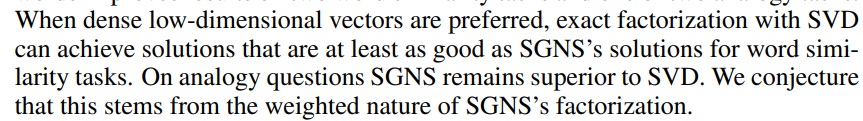

## GloVe

[GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/)

[GloVe original repo](https://github.com/stanfordnlp/GloVe)

[Оригинальная статья](https://nlp.stanford.edu/pubs/glove.pdf)

Модель GloVe представляет собой комбинацию методов, основанных на подсчете, и word2vec:
- считаем глобальные статистики по корпусу - составляем матрицу совпадения слов, которая показывает, как часто слова встречаются друг с другом в данном корпусе

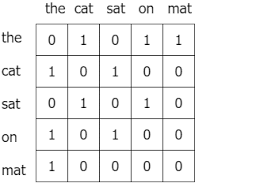

- учим вектора с учетом loss function:

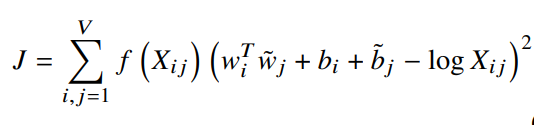

f - weighting function для редких со-встречаемостей:

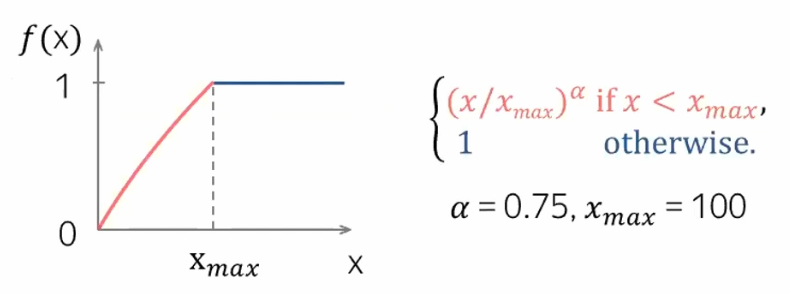

## Проблемы Word2Vec и GloVe

- не учитывается морфология
- проблема с OOV (out of vocabulary) словами, но можно добавить `<unk>`

## FastText

- Слова разбиваются на n-grams

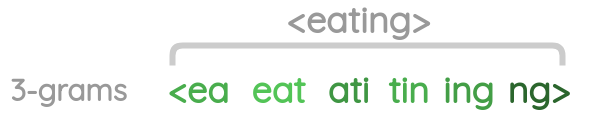

- Вектора для n-gramm обучаются с помощью Skip-gram / CBOW
- Вектор слова - усреднение векторов n-gram

[FastText](https://fasttext.cc/)

**hashing trick**:  n-gram очень много, поэтому зафиксируем максимум векторов, которые хотим обучать, сделаем хэш-таблицу, куда смаппим все n-gram'ы

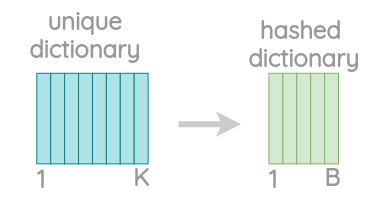

### Обучим свою FastText-модель

In [ ]:
!pip install fasttext

In [ ]:
with open('data.txt', 'w') as f:
  f.writelines(data)

In [ ]:
import fasttext

In [ ]:
%%time

model = fasttext.train_unsupervised('data.txt', wordNgrams=3, dim=300)

CPU times: user 9min 18s, sys: 2.25 s, total: 9min 20s
Wall time: 9min 26s


In [ ]:
model.words[100:110]

['будут',
 'них',
 'После',
 'передает',
 'данным',
 'бы',
 'страны',
 'если',
 'двух',
 'чем']

In [ ]:
model.get_word_vector("россия")[:15]

array([-0.08810738, -0.48922315, -0.2033641 ,  0.4265085 , -0.0983378 ,
        0.23393883, -0.38350183, -0.07021973, -0.00275396,  0.42439485,
       -0.2995641 ,  0.12869366,  0.31806052, -0.16998431,  0.5446321 ],
      dtype=float32)

In [ ]:
model.get_nearest_neighbors('россия')

[(0.8489921689033508, 'россиянок'),
 (0.8484894633293152, 'россиянок.'),
 (0.8402353525161743, 'россиян.'),
 (0.8341452479362488, 'россияне'),
 (0.8126148581504822, 'россиянки'),
 (0.8125166296958923, 'россиян'),
 (0.80893474817276, 'россиян,'),
 (0.8046300411224365, 'россияне,'),
 (0.8027255535125732, 'россиянку'),
 (0.794173538684845, 'россиянам')]

## Что еще почитать


[Word2Vec: покажи мне свой контекст, и я скажу, кто ты](https://sysblok.ru/knowhow/word2vec-pokazhi-mne-svoj-kontekst-i-ja-skazhu-kto-ty/)

[Чудесный мир Word Embeddings: какие они бывают и зачем нужны?](https://habr.com/ru/company/ods/blog/329410/)

[Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)

[Distributed Representations of Words and Phrases and their Compositionality](https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf)

[word2vec Explained: Deriving Mikolov et al.’s Negative-Sampling Word-Embedding Method](https://arxiv.org/pdf/1402.3722v1.pdf)

[Word2Vec: классификация текстовых документов](https://habr.com/ru/post/277563/)

[Пирожки в дистрибутивной семантике](https://habr.com/ru/post/275913/)

[FastText: рецепт работы по коду](https://habr.com/ru/post/492432/)

[FastText: stepping through the code](https://medium.com/@mariamestre/fasttext-stepping-through-the-code-259996d6ebc4)


[Distributed Representations of Sentences and Documents](https://arxiv.org/pdf/1405.4053v2.pdf)

___

[Word2Vec Model Tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)

[FastText Model Tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py)

[Comparison of FastText and Word2Vec](https://github.com/RaRe-Technologies/gensim/blob/ba1ce894a5192fc493a865c535202695bb3c0424/docs/notebooks/Word2Vec_FastText_Comparison.ipynb)



